# Experimentation: Data Pre-Processing
---

In [ ]:
import torch
import monai

from monai.data import (Dataset, ArrayDataset, create_test_image_3d, DataLoader, DataLoader, 
CacheDataset, PersistentDataset, SmartCacheDataset)

from monai.transforms import (Transform, MapTransform, Randomizable, EnsureChannelFirst, EnsureChannelFirstd,
Compose, LoadImaged, ResampleToMatchd)

from monai.apps import TciaDataset
from monai.apps.tcia import TCIA_LABEL_DICT
import pydicom

#
collection, seg_type = "HCC-TACE-Seg", "SEG"

# Create a dictionary to map the labels in the segmentation to the labels in the image
label_dict = {'Liver': 0,
  'Tumor': 1,
  'vessels': 2,
  'aorta': 3}

# Create a composed transform that loads the image and segmentation, then resamples the image to match the segmentation
transform = Compose(
    [
        LoadImaged(reader="PydicomReader", keys=["image", "seg"], label_dict=label_dict),
        EnsureChannelFirstd(keys=["image", "seg"]),
        ResampleToMatchd(keys="image", key_dst="seg"),
    ]
)

# create a dataset for the training data
train_dataset = TciaDataset(
    root_dir="../data/",
    collection=collection,
    section="training",
    transform=transform,
    download=True,
    download_len=2,
    seg_type=seg_type,
    progress=True,
    cache_rate=0.0,
    val_frac=0.2,
)

In [ ]:
# Create a dataloader
train_loader = DataLoader(train_dataset, batch_size=1, num_workers=2)

In [ ]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))

In [37]:
# Print the batch data keys
print(batch.keys())

# Print the batch data shapes
print(batch["image"].shape, batch["seg"].shape)

# Print the batch data types
print(batch["image"].dtype, batch["seg"].dtype)

dict_keys(['image', 'seg'])
torch.Size([1, 1, 512, 512, 87]) torch.Size([1, 4, 512, 512, 87])
torch.float32 torch.float32


In [49]:
# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

torch.Size([512, 512]) torch.Size([512, 512])


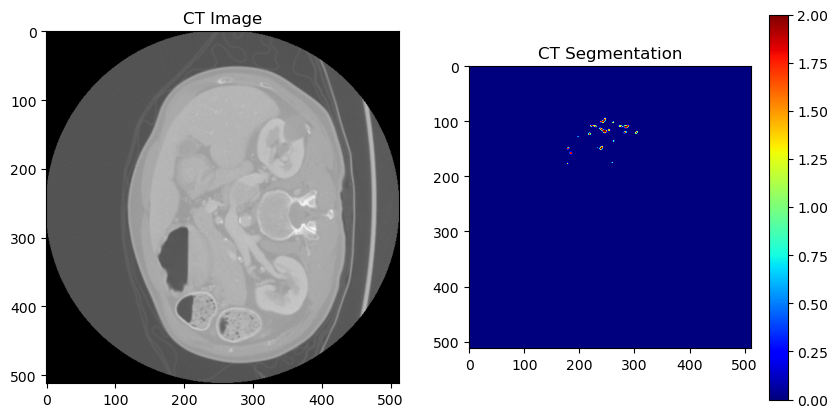

In [54]:
import torch
import matplotlib.pyplot as plt

# Sample a slice from the image
CT_slice = image[0, 0, :, :, 45]

# Get the maximum segmentation class for each pixel in the slice
_, CT_seg_slice_max = torch.max(seg[0, :, :, :, 45], dim=0)

print(CT_slice.shape, CT_seg_slice_max.shape)

# Plot the image and segmentation slice as a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(CT_slice, cmap="gray")
axes[0].set_title("CT Image")
axes[1].imshow(CT_seg_slice_max, cmap="jet")
axes[1].set_title("CT Segmentation")
plt.colorbar(mappable=axes[1].imshow(CT_seg_slice_max, cmap='jet'), ax=axes[1])
plt.show()